# Проблематика

Проблемы с рекомендационной системой могут нанести серьезный ущерб бизнесу в различных аспектах:

## Пользователи
- Недостаточно точные рекомендации могут вызвать разочарование у пользователей, что приведет к потере доверия к сервису.
- Плохие рекомендации могут привести к уменьшению степени удовлетворенности клиентов, что в свою очередь повлияет на повторные покупки и лояльность.
- Долгие процессы выбора товаров из-за некачественных рекомендаций могут вызвать раздражение и утомление у пользователей.
- Снижение удовлетворенности клиентов может привести к уходу на конкурирующие платформы с более точными и удобными рекомендациями.
- Плохие рекомендации могут привести к негативным отзывам и репутационным проблемам для бренда.
- Недостаточная защита данных и доверие к системе рекомендаций может вызвать тревогу по поводу конфиденциальности информации.

## Бизнес
- Низкая точность рекомендаций может привести к потере потенциальной прибыли, так как пользователям могут не понравиться предлагаемые товары.
- Ухудшение пользовательского опыта из-за плохих рекомендаций может снизить общий объем продаж и отток клиентов.
- Потеря лояльности пользователей может значительно сказаться на долгосрочной прибыли и влиянии бренда на рынке.
- Компании рискуют отстать от конкурентов, у которых рекомендационные системы более точные и эффективные, что может привести к потере рыночной доли и конкурентного преимущества.
- Некачественные рекомендации могут привести к излишнему запасу товаров или низкому обороту запасов из-за недооценки спроса.
- Сложности с рекомендациями могут требовать дополнительных затрат на улучшение системы и обучение персонала.
- Недостаточная прозрачность и понимание алгоритмов рекомендаций могут вызвать сложности при обосновании решений перед заказчиками или регуляторными органами.
- Некорректные или предвзятые рекомендации могут привести к возможным обвинениям в дискриминации или неправильном воздействии на поведение пользователей.

# Формализация Задачи

## Задача:
Создать систему для генерации персонализированных рекомендаций на основе истории покупок пользователей. Результативность рекомендаций будет оцениваться на основе последующих покупок пользователей и точности прогнозирования алгоритма.


### Формальная Постановка Задачи Реализации Рек. Системы
Матрицу $R∈ \mathbb{N}^{m \times n}$ , где m - количество пользователей, а n - количество различных товаров, можно определить как:
$$
R  = \Big(b(i, j)\Big)_{i,j=1}^{m,n}
$$
$$
b(i,j) = \cases{
    1 & \text{Если пользователь i покупал товар j} \\
    0 & \text{Если пользователь i НЕ покупал товар j}
}
$$

Тогда для каждого пользователя i, можно определить вектор $x_i$, который является срезом матрицы $R$ для этого пользователя. Этот вектор несет в себе информацию о всех покупках пользователя.

$R^*$ является измененой матрицей $R$, в которой некоторые элементы заменены с 1 на 0. Эта матрица позволяет симулировать разделение на тренировочную и тестовую выборку (например отрезать датасет по какой-то дате покупок).

Пусть $a(x \mid R^*)$ - алгоритм рекоммендации, где $x$ - идентификатор пользователя $a: \mathbb{N} \to \mathbb{N}^n$. Тогда матрица рекоммендаций для всех пользователей $A$ имеет вид:
$$
A = \begin{bmatrix}
a(x_1 \mid R^*) \\
\vdots\\
a(x_m \mid R^*)
\end{bmatrix}
$$

А цель оптимизации может быть задана как:
$$
MSE = \sum_{i=1}^n\sum_{j=1}^m (A_{ij} - R_{ij})^2 \to \min_a
$$



### Цель:
Разработать репозиторий с набором скриптов, обернутых в Docker-образ, который принимает уникальный идентификатор пользователя в качестве входного параметра и возвращает персонализированные рекомендации (в перспективе можно будет сделать batch-input на входе). Код должен содержать подробные инструкции по установке, а также обеспечивать логирование доступных экспериментов для воспроизведения и анализа.



### План Работы:
0. Проанализировать и предобработать данные, чтобы убедиться в их качестве и пригодности для обучения модели рекомендаций.
1. Провести Research, в котором станут явными подходящие алгоритмы для этой задачи и обозначить их плюсы и минусы. Далее обосновать выбор алгоритма.
2. Сформировать и обосновать технику валидации, разбить данные на выборки.
3. Разработать и обучить модель рекомендаций, которая будет учитывать поведение пользователей и предсказывать их предпочтения.
    - Выбрать метрику оценки качества и обосновать выбор
    - Разработать baseline (может быть несколько алгоритмов)
    - Реализовать выбранное решение/я
    - Протестировать работу baseline
    - Выбрать итоговое решение для дальнейшей оптимизации и обосновать выбор
4. Оптимизация решения
    - Гипер-параметры
    - Оптимизация работы
    - Важные и мало-важные признаки
    - Оценить масштаб улучшения
5. Production
    - Реализовать итоговое решение в виде набора python-скриптов
    - Добавить логирование
    - Обернуть полученный набор скриптов в Docker-образ
    - Сделать UI на streamLIT или Gradio
    - Подготовить итоговую презентацию с отображением всех этапов работы (до 10 слайдов)


# Setup Notebook

In [43]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random

In [45]:
def set_seed(seed: int = 42) -> None:
    np.random.seed(seed)
    random.seed(seed)
    # torch.manual_seed(seed)
    # torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    # torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

set_seed()

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')
plt.style.use('Solarize_Light2')

Random seed set as 42


In [46]:
data_path = "drive/MyDrive/wb_school_task_1.csv"
df = pd.read_csv(data_path)

In [47]:
# 21_265_784 - 21 миллион заказов
df.shape

(21265784, 3)

In [48]:
df.head()

,user_id,item_id,order_ts
0,550614,264,2023-01-01 00:28:09.000000
1,571051,580,2023-01-01 00:41:47.000000
2,571051,180,2023-01-01 00:41:47.000000
3,47164,5135,2023-01-01 00:53:35.000000
4,219072,2668,2023-01-01 01:02:29.000000


# Анализ Данных на Пригодность

Типы user_id и item_id не это int, это уже хорошо, значит что мусора вероятно нет в них

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21265784 entries, 0 to 21265783
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   item_id   int64 
 2   order_ts  object
dtypes: int64(2), object(1)
memory usage: 486.7+ MB


С негативными числами все ок

In [50]:
df[df["user_id"] <= 0]

,user_id,item_id,order_ts


In [51]:
df[df["item_id"] <= 0]

,user_id,item_id,order_ts


In [52]:
df["order_ts"] = pd.to_datetime(df["order_ts"])

Пропущенных значений не найдено, это хороший знак

In [53]:
print(f"NaN counts: \n\n{df.isna().sum()}")

NaN counts: 

user_id     0
item_id     0
order_ts    0
dtype: int64


In [54]:
print(f"Данные распространяются на период: {df['order_ts'].min()} - {df['order_ts'].max()}")

Данные распространяются на период: 2023-01-01 00:00:05 - 2023-03-31 23:59:59.947831


Замечены дубликаты, а также в некоторых ситуациях пользователи заказывают один товар несколько раз в короткие промежутки времени. Возможно стоит считать такие заказы за один в будущем, так как это возможно связано с перезаказом, а не заказом второй копии того же товара.

In [55]:
duplicates = df[df.duplicated(subset=list(df.columns), keep=False)].sort_values(by=list(df.columns))
print("Примеры дубликатов: ")
display(duplicates.head(6))

print(f"Кол-во дубликатов: {duplicates.shape[0]}")

df = df.drop_duplicates(subset=list(df.columns), keep="first")

duplicates = df[df.duplicated(subset=list(df.columns), keep=False)].sort_values(by=list(df.columns))
print(f"Кол-во дубликатов после очистки: {duplicates.shape[0]}")

Примеры дубликатов: 


,user_id,item_id,order_ts
7646365,3,11,2023-02-02 02:06:18.031900
7701663,3,11,2023-02-02 02:06:18.031900
8522313,3,11,2023-02-05 16:56:01.496197
8571165,3,11,2023-02-05 16:56:01.496197
13882779,3,41,2023-02-27 01:14:14.708195
14086604,3,41,2023-02-27 01:14:14.708195


Кол-во дубликатов: 3326693
Кол-во дубликатов после очистки: 0


После очистки от дублей, датасет уменьшился примерно на 2 миллиона наблюдений.

In [56]:
df.shape

(19259287, 3)

### В заключении хочу сказать, что данные имеют высокую пригодность. Немного настораживает отсутствие дополнительных фичей по пользователям, но в рамках разработки алгоритма, который не использует дополнительные фичи этот датасет кажется подходящим.

# EDA

Предположим, для каждого заказа нужно в продакшене будет сформировывать вектор предложений, тогда можно посчитать максимальную скорость инференса на одного пользователя. Очевидно, что может быть запущено несколько копий модели, но все же интересно посчитать эту метрику.

In [58]:
n_months = 3
orders_per_month = df.shape[0] / n_months

seconds_in_month = 30*24*60*60
max_inference_time = seconds_in_month / orders_per_month

print("В среднем максимальное время на инференс одного пользователя должно состовлять: ", round(max_inference_time, 4), "секунд")

В среднем максимальное время на инференс одного пользователя должно состовлять:  0.4038 секунд


In [59]:
df_part = df.sample(frac=0.1)

### Анализ по Популярности

С несколькими выбросами превышающими 75 заказов, большинство пользователей делает меньше заказов. Данные выбросы не должны обойтись без внимания. В будущем будет нужно подумать, стоит ли удалять эти выбросы или нет, в зависимости от архитектуры модели.

Text(0, 0.5, 'Number of Purchases')

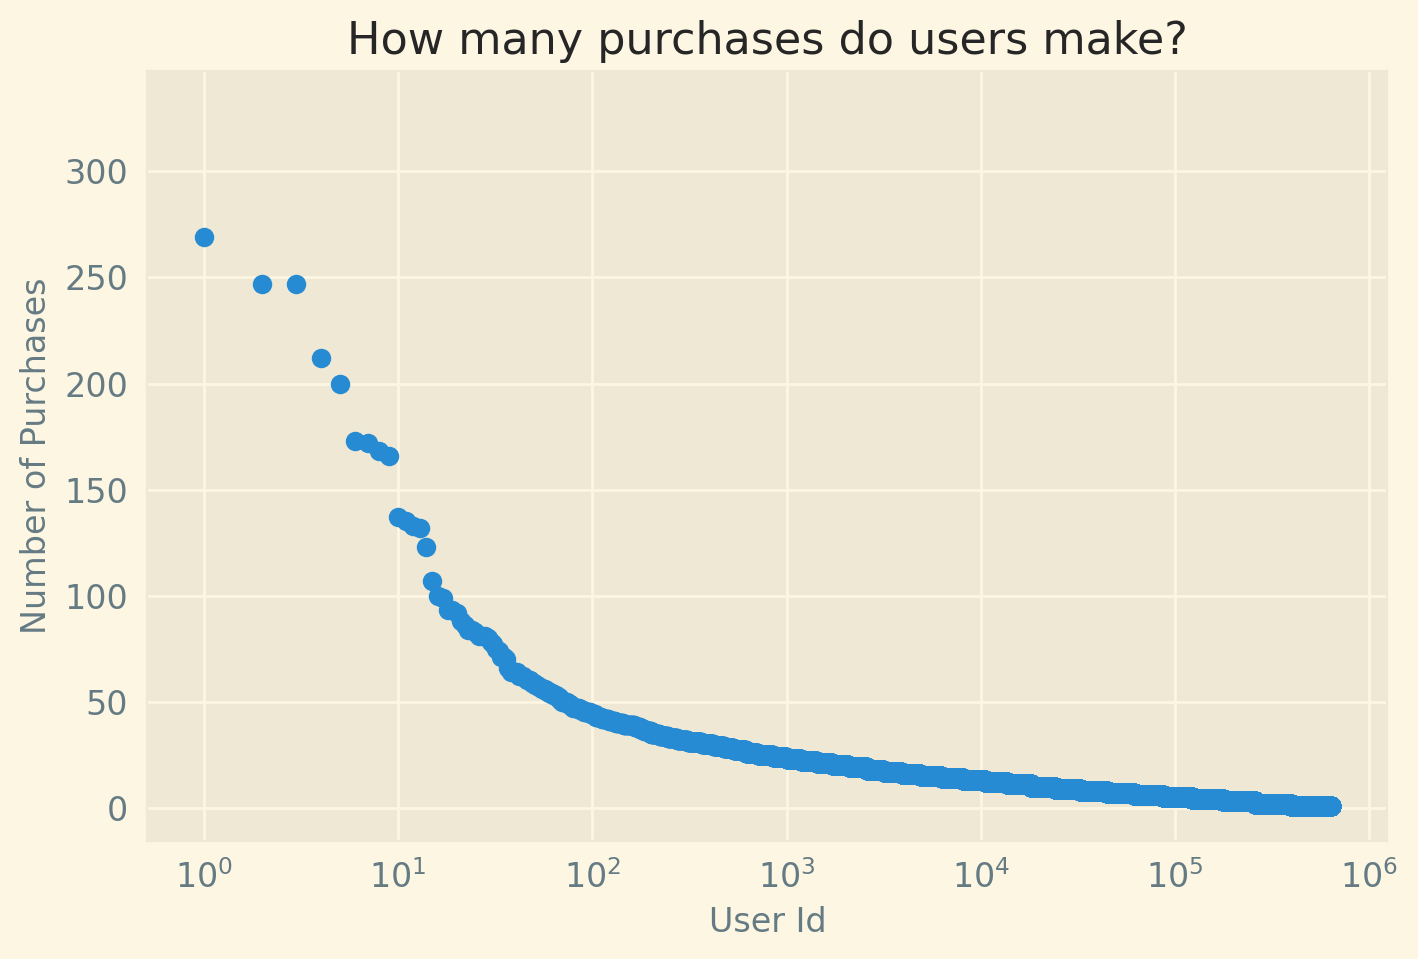

In [60]:
user_purchase_count = df_part["user_id"].value_counts().sort_values(ascending=False).reset_index(drop=True)

plt.scatter(x=user_purchase_count.index, y=user_purchase_count.values)
plt.xscale("log")

plt.title("How many purchases do users make?")
plt.xlabel("User Id")
plt.ylabel("Number of Purchases")

Важные показатели, среднее и медиана. Среднее число покупок на человека за 3 месяца ~= 2 . Медианное составляет 1 покупка. То есть клиент в среднем имеет 2 покупки, однако распределение смещено в сторону больших заказщиков. 50% покупают 1 товар за 3 месяца, и более 75% покупают более 3 товаров в этот период. Минимум - 1 заказ и максимум - 170 заказов.

In [61]:
user_purchase_count.describe()

count    635446.000000
mean          3.030830
std           3.156718
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         331.000000
Name: user_id, dtype: float64

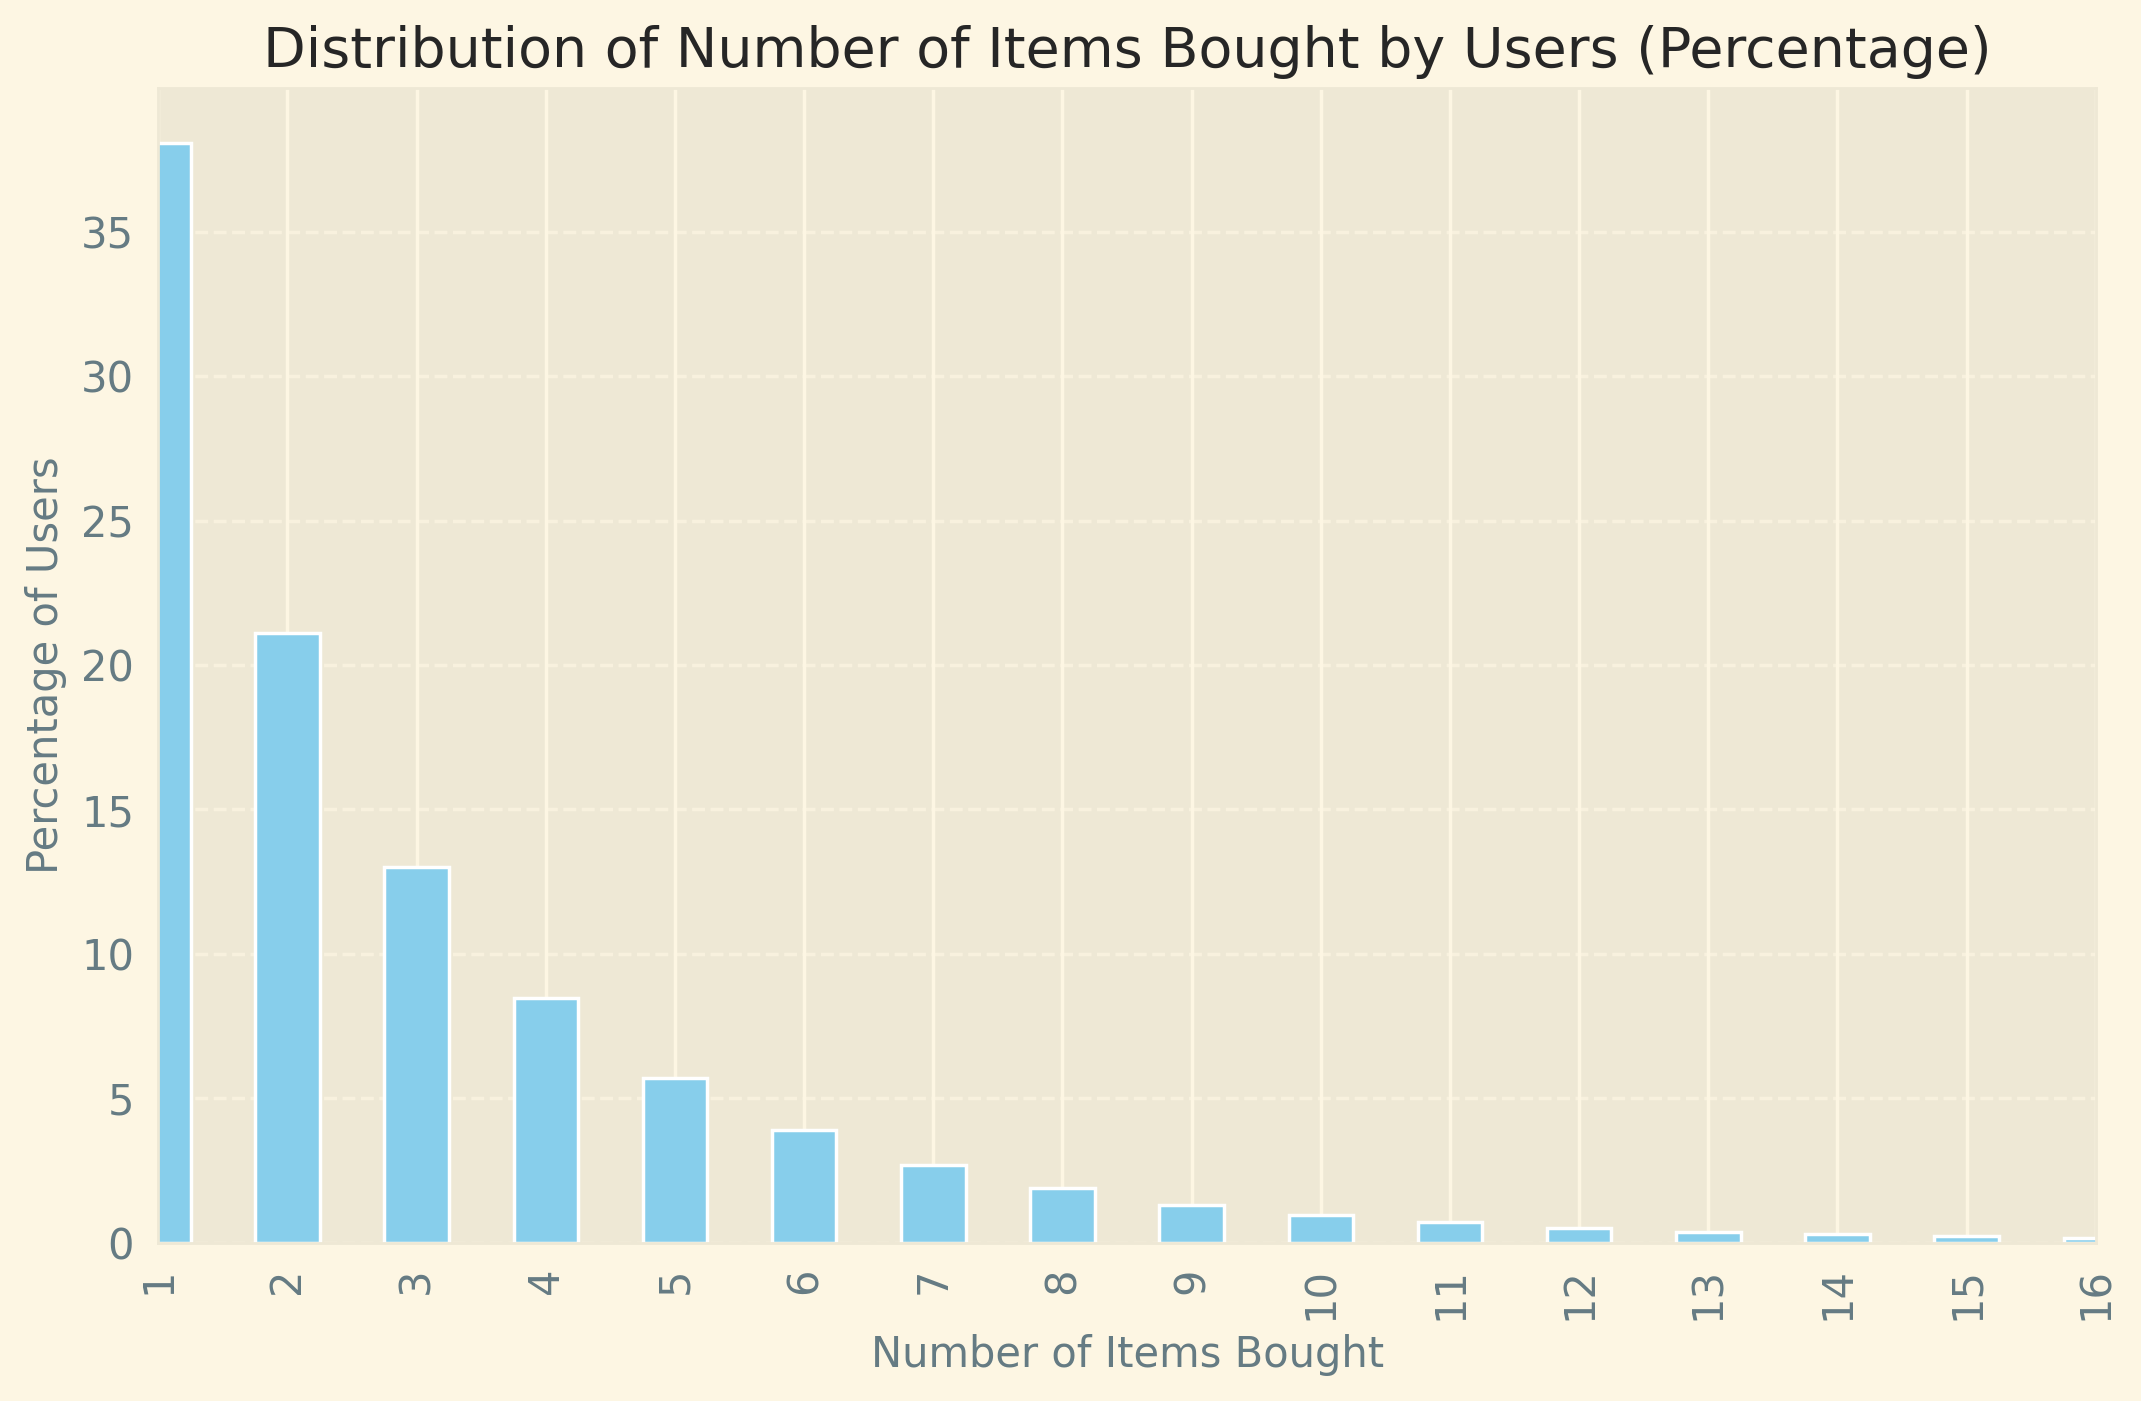

In [62]:
item_counts = user_purchase_count.value_counts().sort_index()

total_users = item_counts.sum()
item_percentages = (item_counts / total_users) * 100

plt.figure(figsize=(10, 6), dpi=125)
item_percentages.plot(kind='bar', color='skyblue')
plt.title('Distribution of Number of Items Bought by Users (Percentage)')
plt.xlabel('Number of Items Bought')
plt.ylabel('Percentage of Users')
plt.xlim([0, 15])
# plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

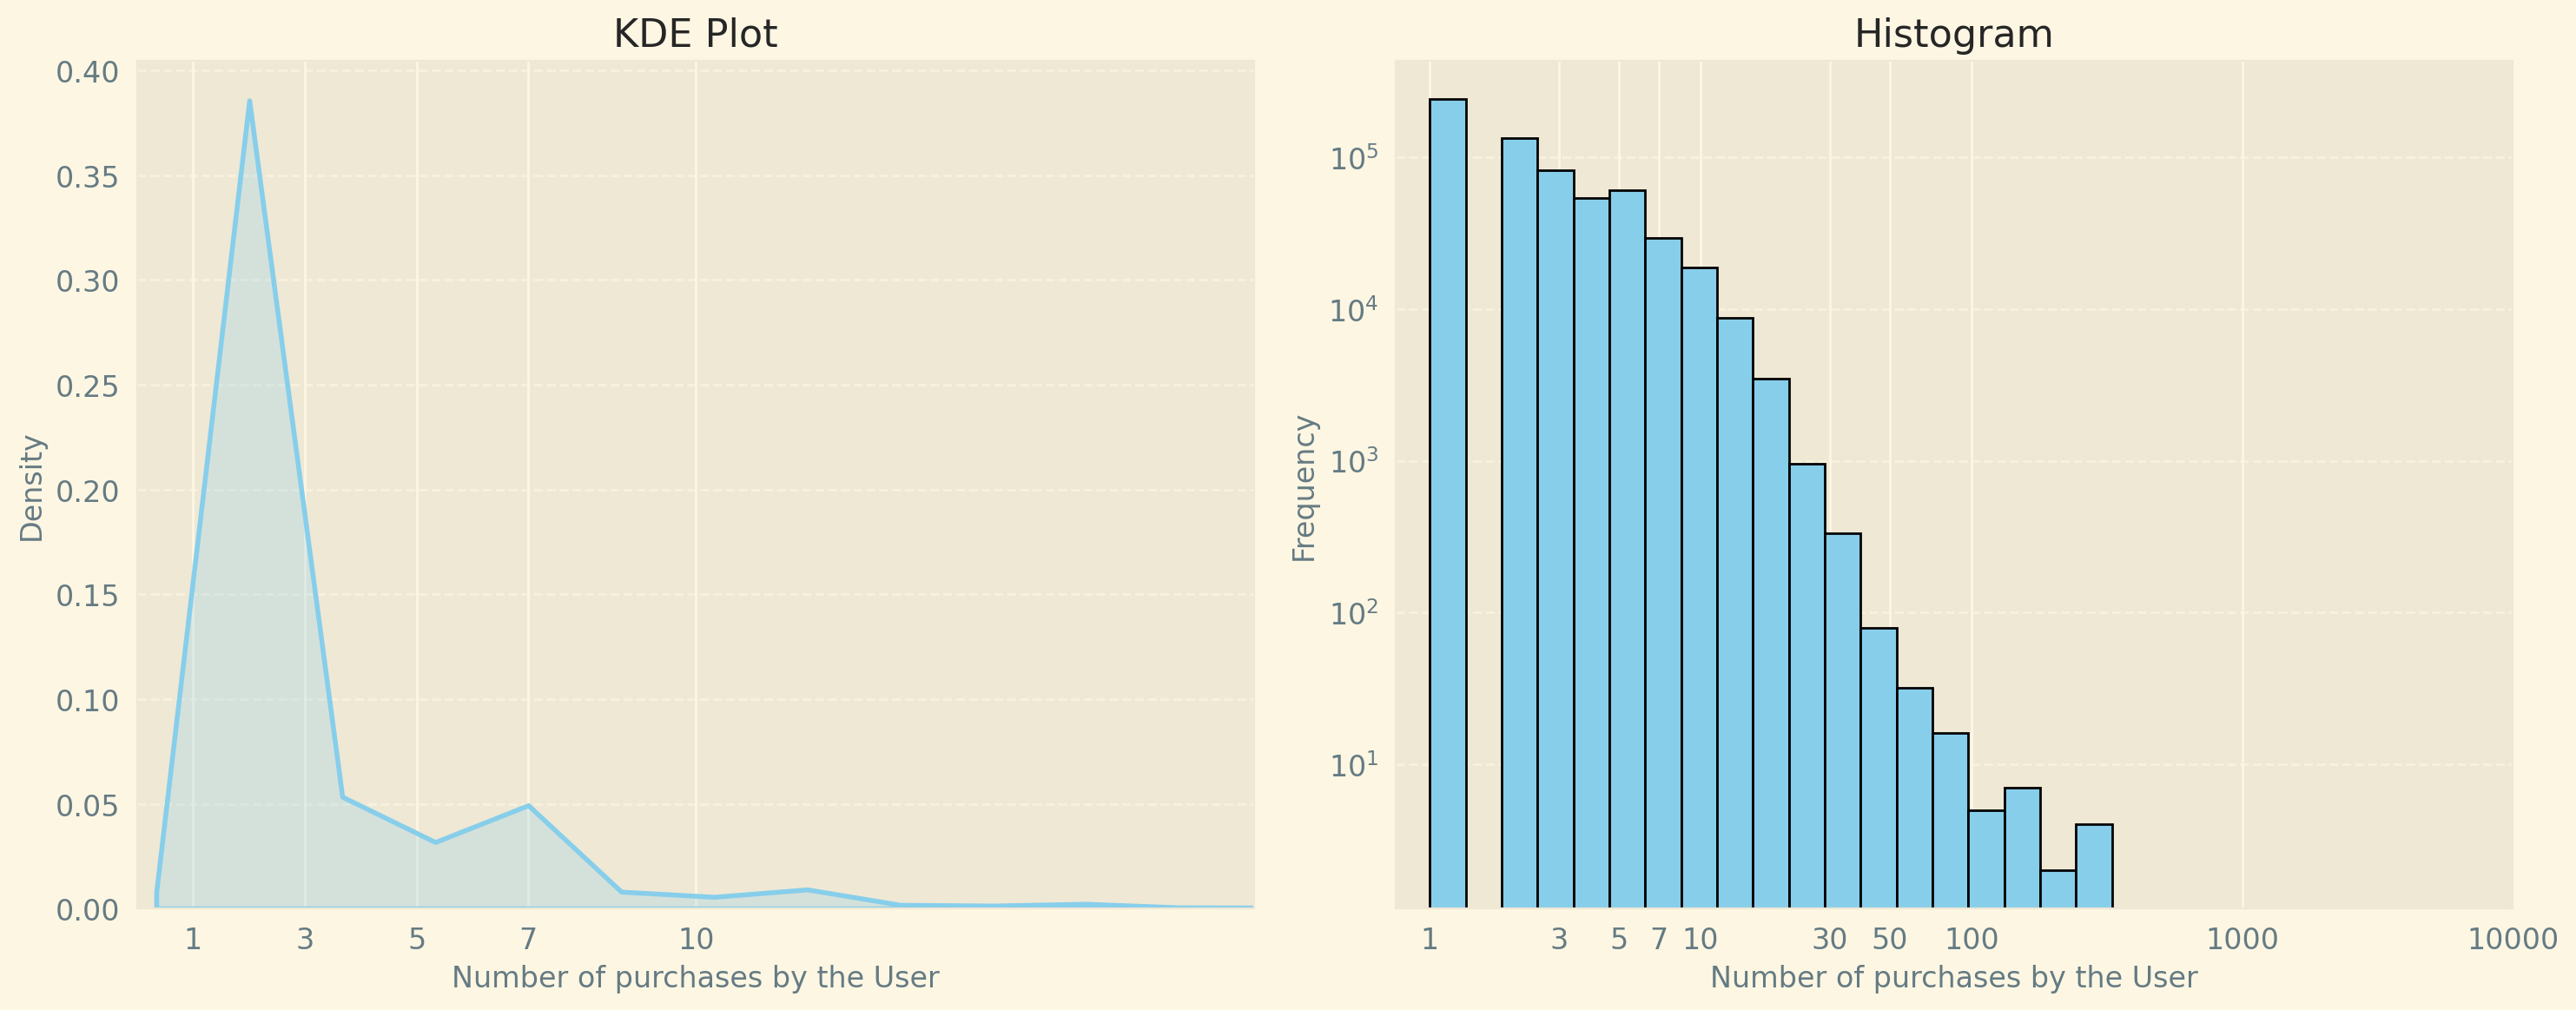

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# KDE plot
sns.kdeplot(user_purchase_count, color='skyblue', fill=True, linewidth=2, ax=axs[0])
axs[0].set_title('KDE Plot')
axs[0].set_xlabel('Number of purchases by the User')
axs[0].set_ylabel('Density')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
# axs[0].set_xscale('log')
ticks = [1, 3, 5, 7, 10, 30, 50, 100, 1000, 10000]
axs[0].set_xticks(ticks)
axs[0].set_xticklabels(ticks)
axs[0].set_xlim([0,20])

# Histogram
log_bins = np.logspace(np.log10(user_purchase_count.min()), np.log10(user_purchase_count.max()), num=20)
axs[1].hist(user_purchase_count, bins=log_bins, edgecolor='black', color='skyblue', log=True)
axs[1].set_title('Histogram')
axs[1].set_xlabel('Number of purchases by the User')
axs[1].set_ylabel('Frequency')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].set_xscale('log')
axs[1].set_xticks(ticks)
axs[1].set_xticklabels(ticks)

plt.tight_layout()
plt.show()

Заметно, что есть немного товаров, которые покупаются в рекордно больших количествах ( более 10000). Остальные товары продаются меньше. Здесь стоит заметить, что мало товаров продаются по одному разу, но много пользователей покупает лишь по одному товару. Стоит запомнить об этих выбросах на будущее и возможно убрать их, если архитектура из-за них плохо обучается.

Text(0, 0.5, 'Number of Purchases')

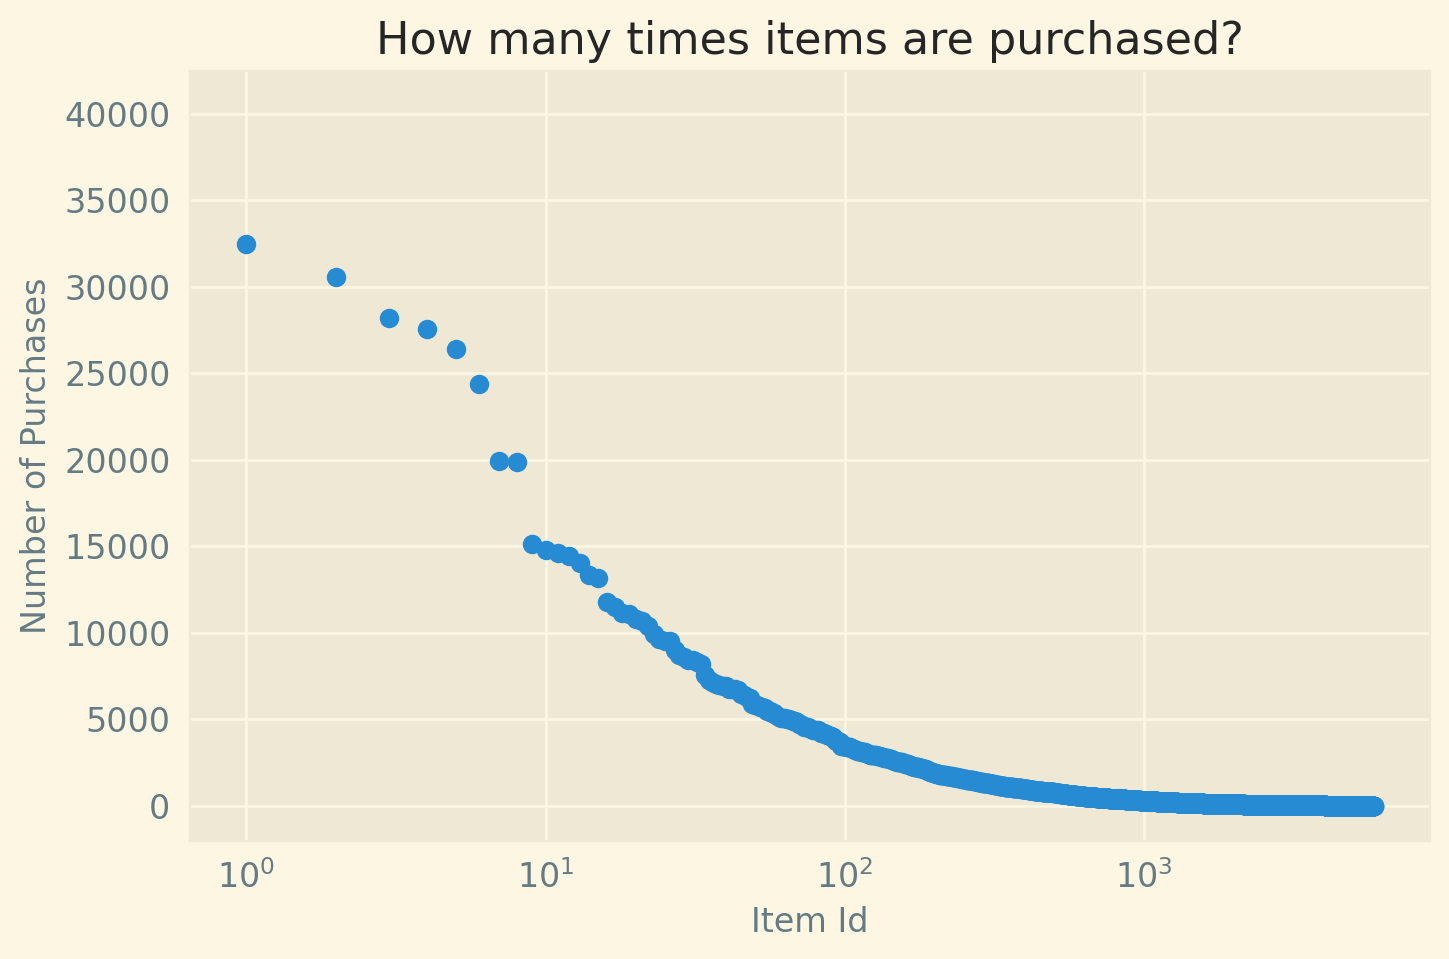

In [64]:
item_purchase_count = df_part["item_id"].value_counts().sort_values(ascending=False).reset_index(drop=True)

plt.scatter(x=item_purchase_count.index, y=item_purchase_count.values)
plt.xscale("log")

plt.title("How many times items are purchased?")
plt.xlabel("Item Id")
plt.ylabel("Number of Purchases")

В среднем каждый товар покупают 175 раз, однако это очень смещенный показатель. Видно что, медиана - 18, половина товаров заказывается менее 19 раз. 25% товаров заказывается от 19 до 81, но есть и *золотая* четверть товаров, которые заказываются от 82 до 20230 раз, они то и смещают среднюю оценку.

In [65]:
item_purchase_count.describe()

count     5833.000000
mean       330.178124
std       1485.403737
min          1.000000
25%          6.000000
50%         31.000000
75%        142.000000
max      40474.000000
Name: item_id, dtype: float64

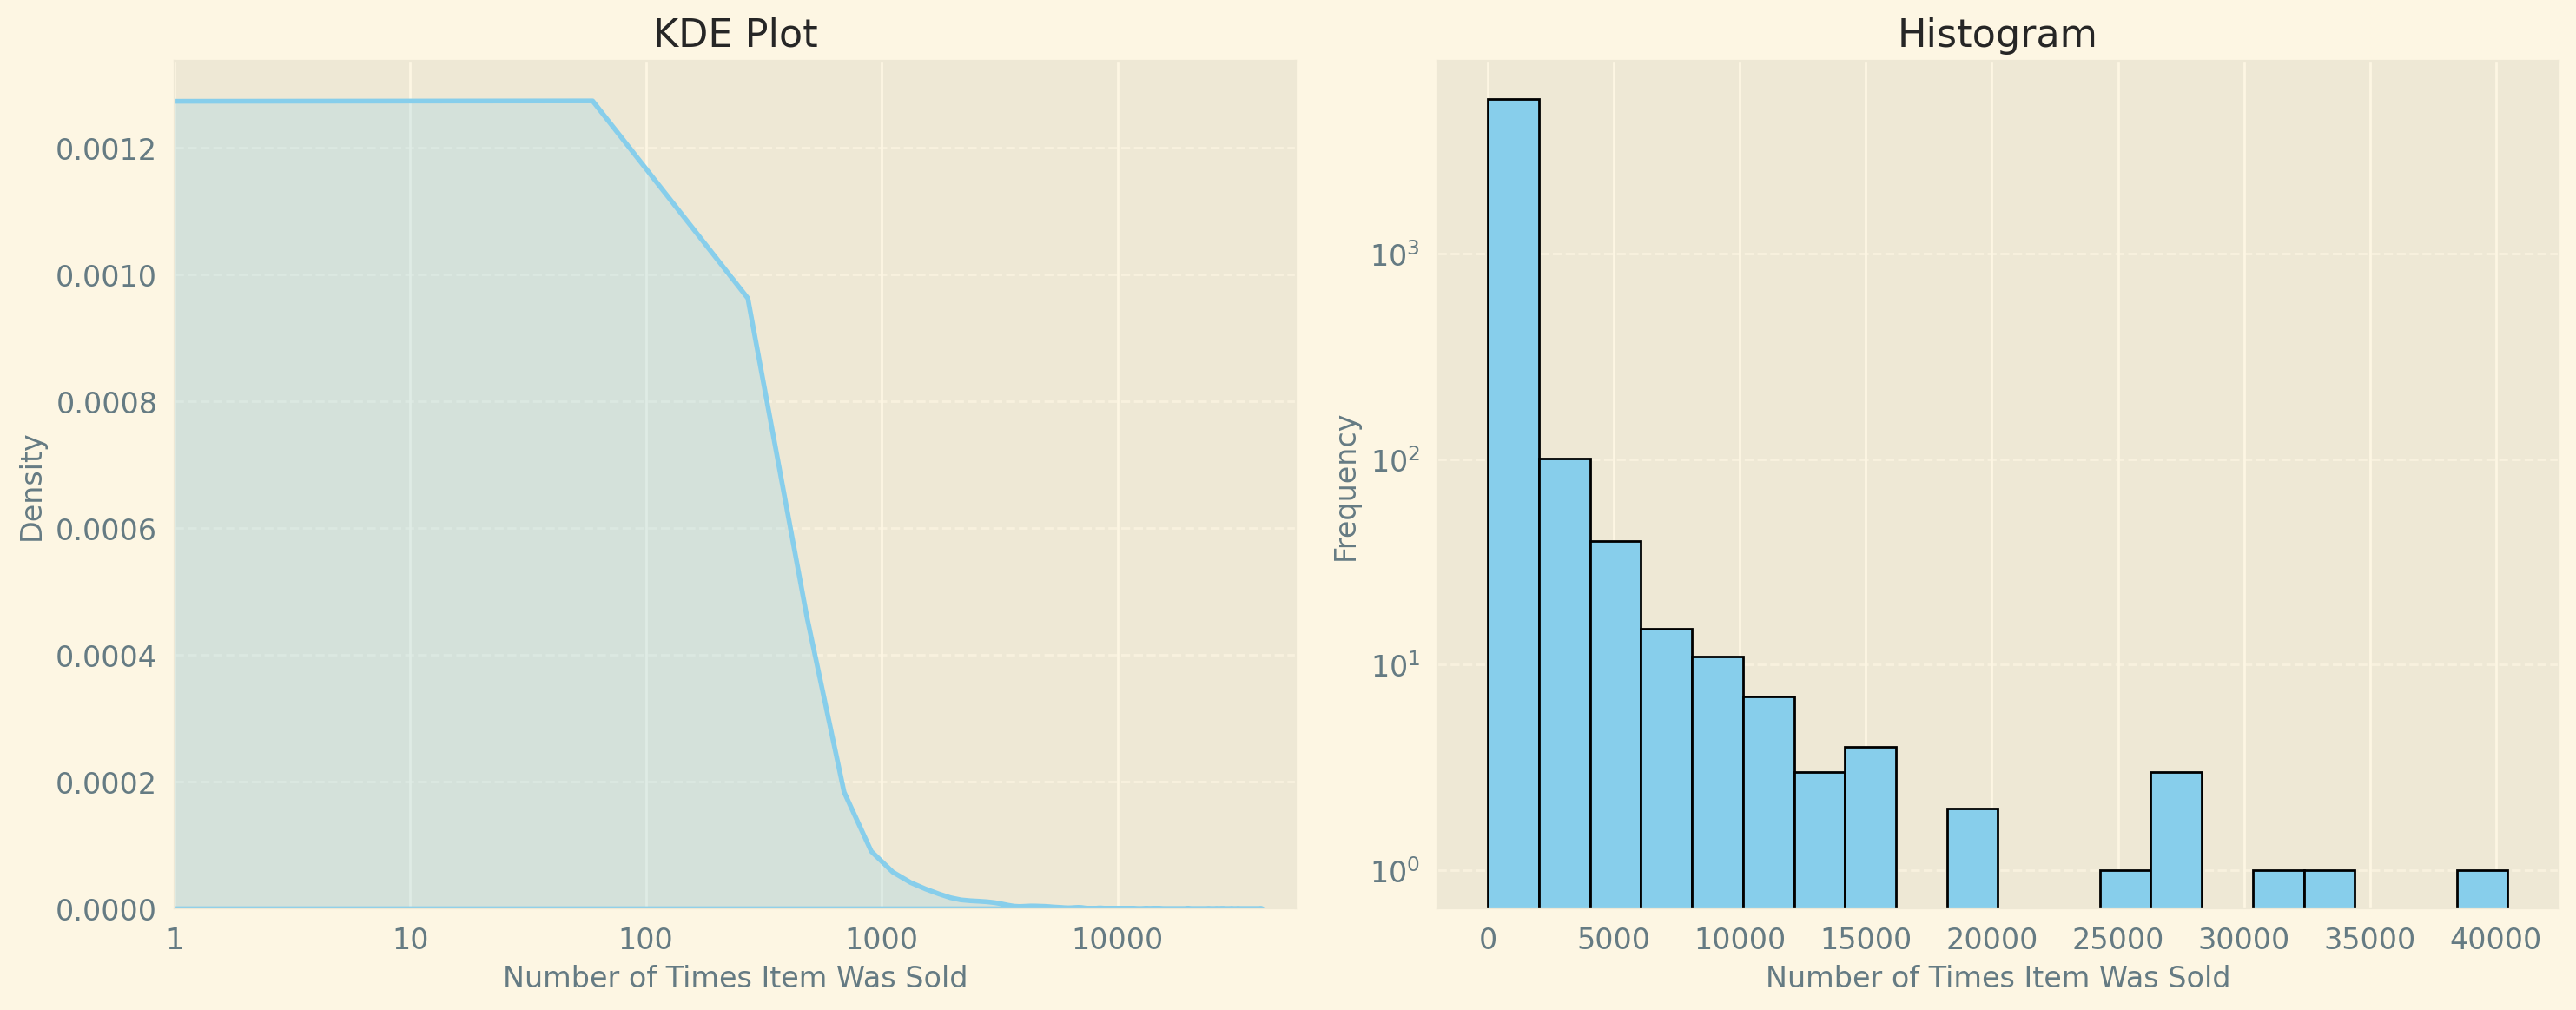

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# KDE plot
sns.kdeplot(item_purchase_count, color='skyblue', fill=True, linewidth=2, ax=axs[0])
axs[0].set_title('KDE Plot')
axs[0].set_xlabel('Number of Times Item Was Sold')
axs[0].set_ylabel('Density')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].set_xscale('log')
ticks = [1, 10, 100, 1000, 10000]
axs[0].set_xticks(ticks)
axs[0].set_xticklabels(ticks)

# Histogram
axs[1].hist(item_purchase_count, bins=20, edgecolor='black', color='skyblue')  # Linear bins
axs[1].set_title('Histogram')
axs[1].set_xlabel('Number of Times Item Was Sold')
axs[1].set_ylabel('Frequency')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].set_yscale('log')

plt.tight_layout()
plt.show()

 Из данной статистики видно, что есть значимая часть товаров, которые покупают менее 5 раз. Стоит проверить насколько много товаров было куплено всего 1,2,3 и 4 раза

In [67]:
print("Процент непопулярных товаров")
item_purchase_count.value_counts(normalize=True) * 100

Процент непопулярных товаров


1        8.160466
2        5.023144
3        3.823076
4        3.445911
5        2.623007
           ...   
450      0.017144
1090     0.017144
447      0.017144
446      0.017144
40474    0.017144
Name: item_id, Length: 1025, dtype: float64

10% товаров покупаются всего 1 раз, вероятно рекомендационная система не сможет обучиться на товаре, который купили всего 1 раз, поэтому **это тоже стоит рассматривать в будущем как выброс**

### Анализ по Времени

In [68]:
df_part.head()

,user_id,item_id,order_ts
6616726,783291,348,2023-03-07 15:22:37.016946
4169708,628981,212,2023-01-17 10:13:26.004264
11709533,157283,350,2023-02-16 10:35:11.411404
17790166,65347,363,2023-03-14 14:42:12.191993
18715460,75055,217,2023-03-26 09:04:44.853247


Особой сезонности по неделям не замечается, видны небольшие колебания в средних

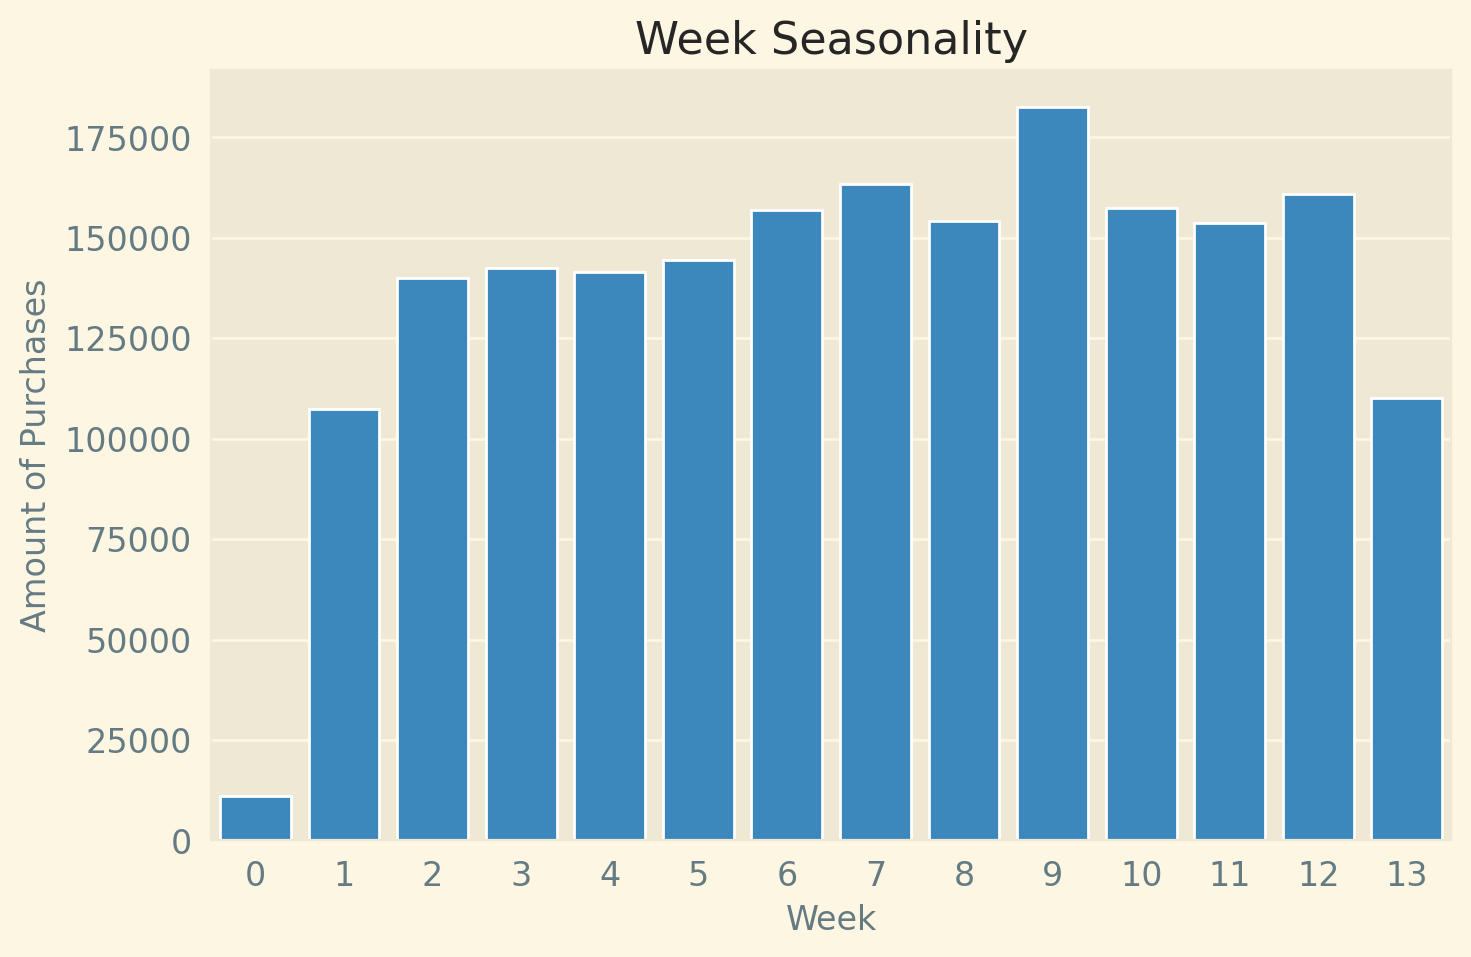

In [69]:
df_part['order_week'] = df_part['order_ts'].dt.isocalendar().week

df_part.loc[df_part["order_week"] > 4 * 12, "order_week"] = 0

orders_every_week = df_part.groupby(by="order_week").count()
sns.barplot(x="order_week",y="user_id", data=orders_every_week)

plt.title('Week Seasonality')
plt.xlabel('Week')
plt.ylabel('Amount of Purchases')
plt.show()

По месяцам виден восходящий тренд, из этого следует, что нужно проектировать систему, которая сможет справляться не только с нынешней нагрузкой но и с нагрузкой большей чем в данный момент

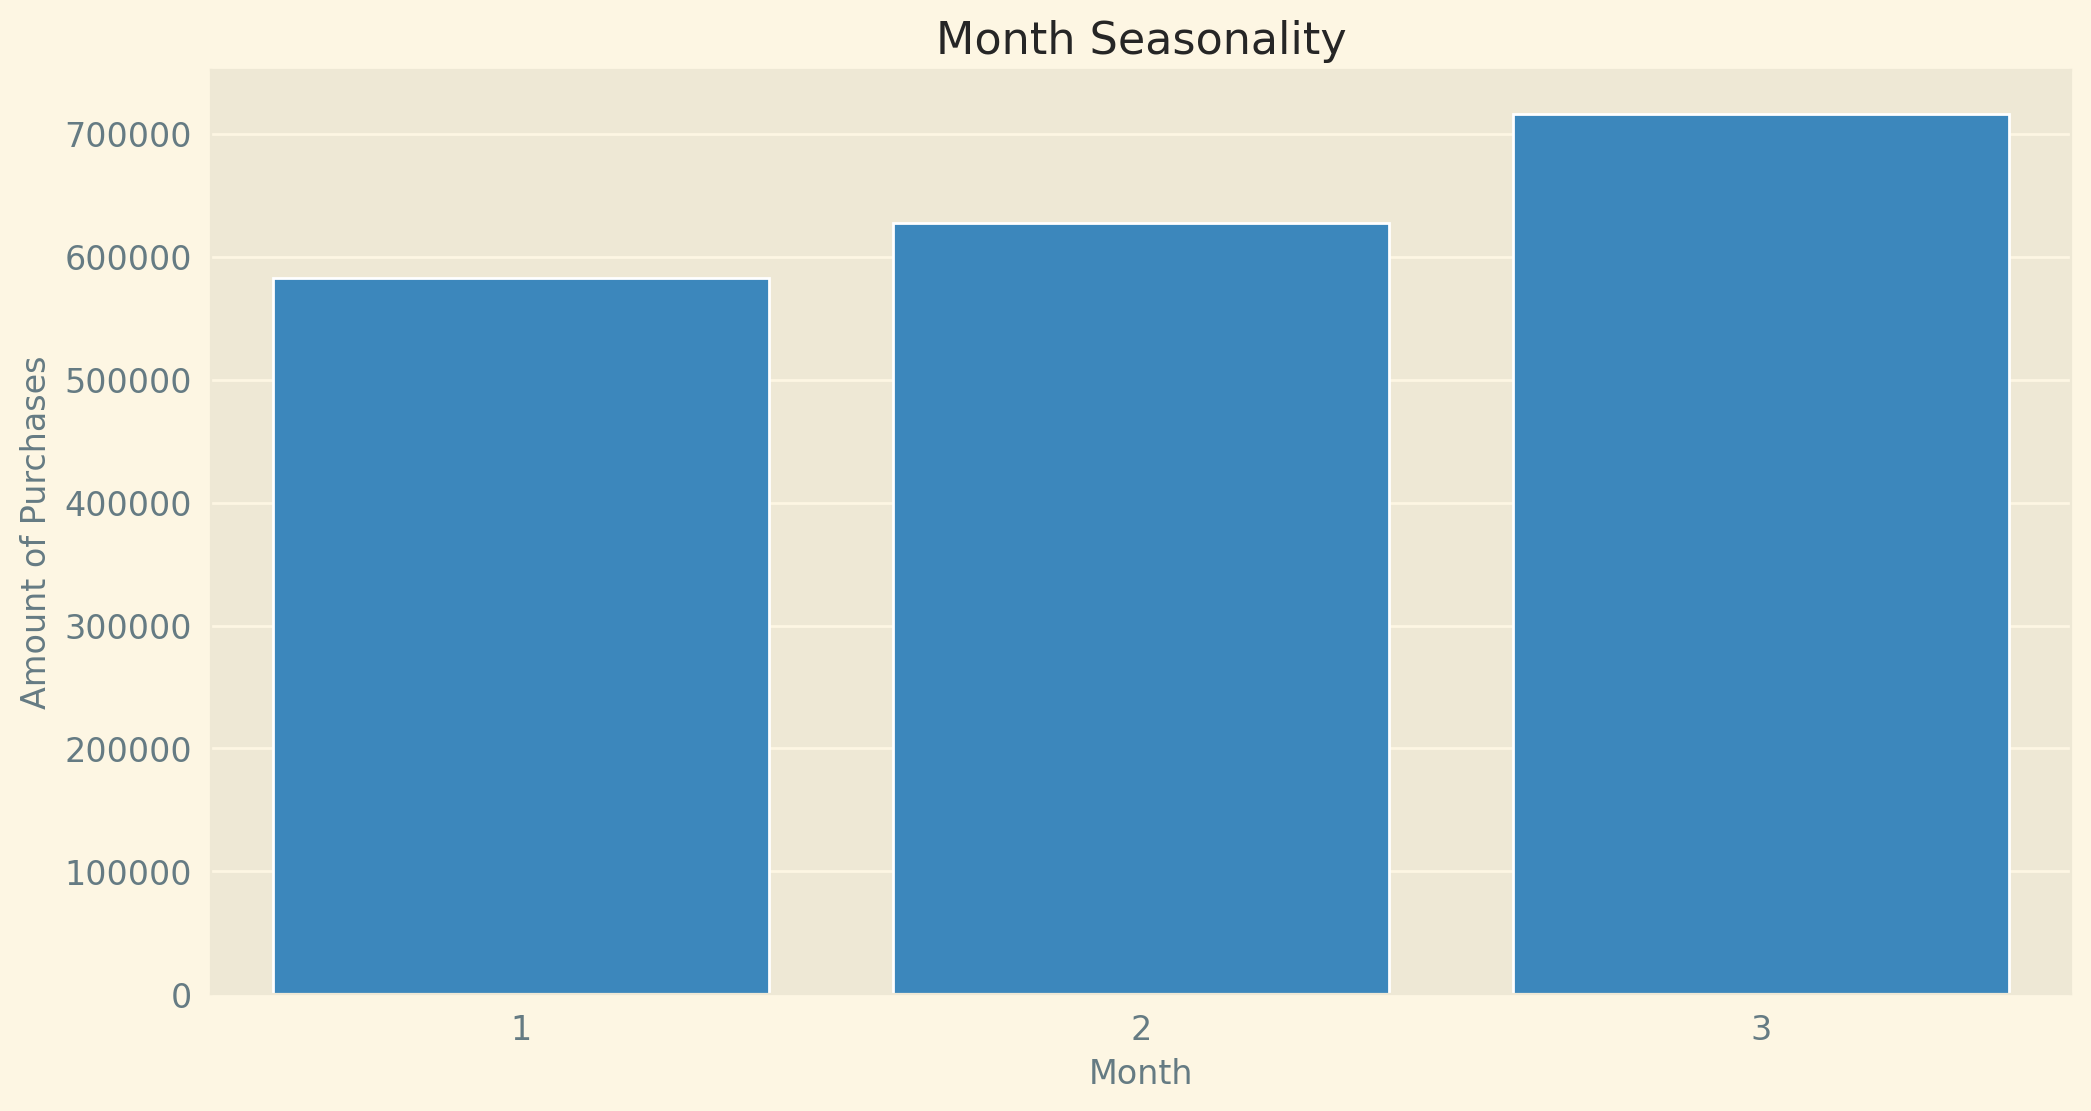

In [70]:
plt.figure(figsize=(12, 6))

df_part["order_month"] = df_part["order_ts"].dt.month
orders_every_week = df_part.groupby(by="order_month").count()
sns.barplot(x="order_month",y="user_id", data=orders_every_week)

plt.title('Month Seasonality')
plt.xlabel('Month')
plt.ylabel('Amount of Purchases')
plt.show()

Небольшие колебания без особой сезонности, видно что суббота очень нестабильный день. Большое стандартное отклонение в этот день. Это в теории может влиять на репрезентативность данных с этого дня. Воскресенье имеет максимальную медиану, вероятно в этот день ситуация лучше всего располагает на заказы из маркетплейсов.

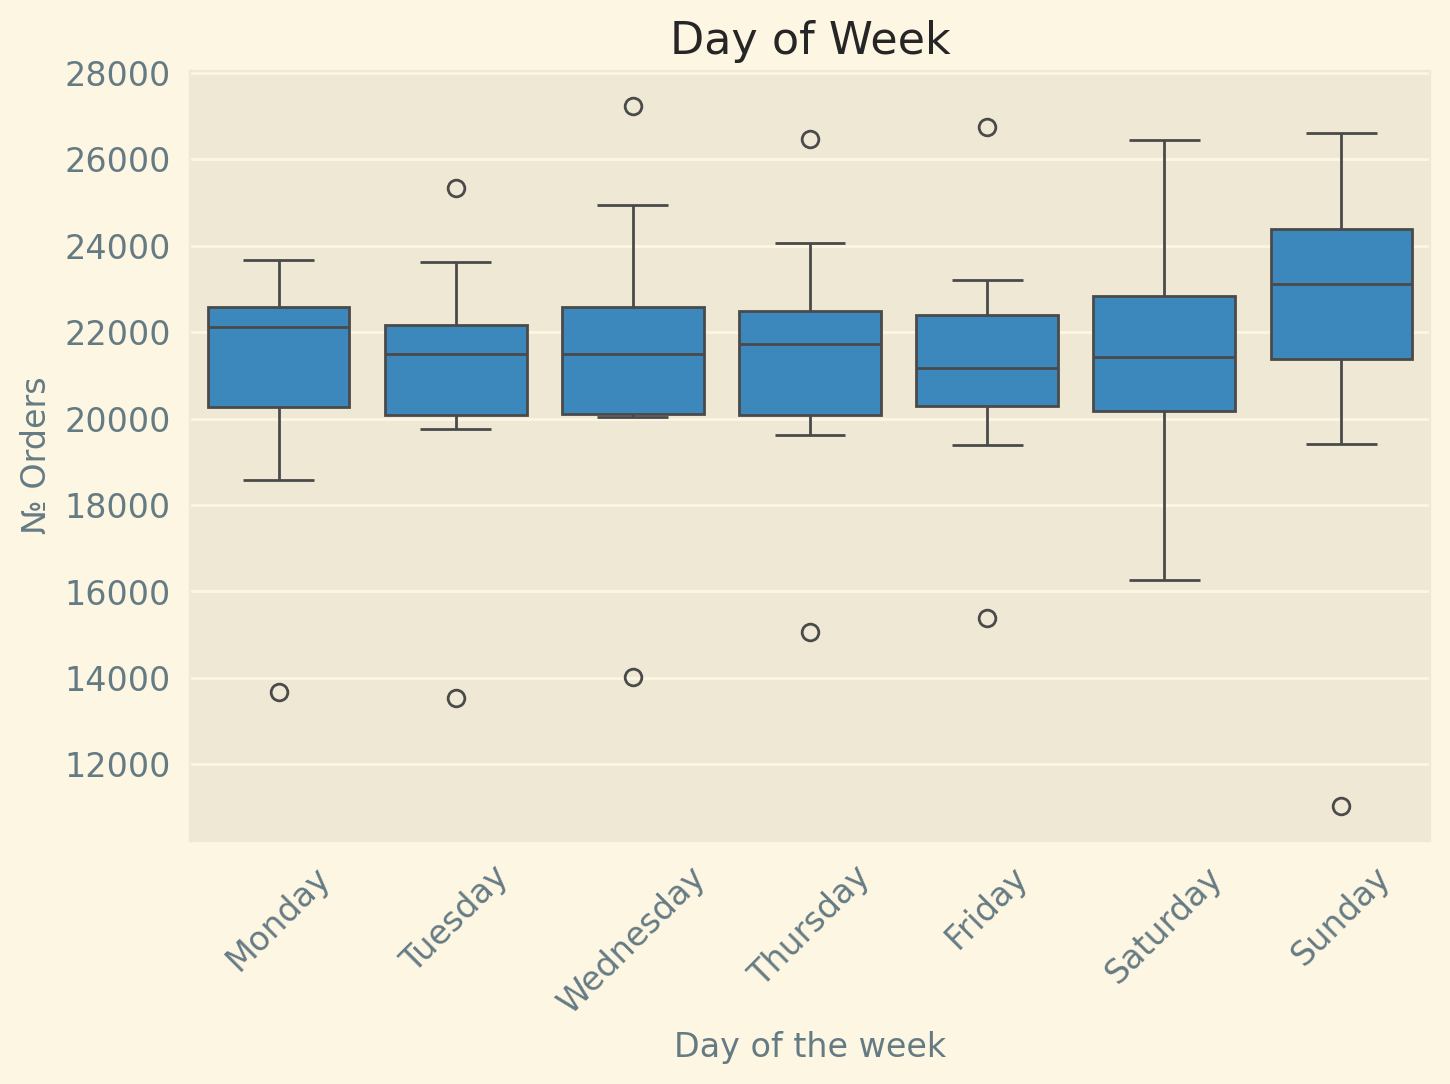

In [101]:
from calendar import day_name

df_part['day_of_year'] = df_part['order_ts'].dt.dayofyear

orders_per_day = df_part['day_of_year'].value_counts().sort_index()
first_day_of_year_week_index = df_part["order_ts"].min().dayofweek

orders_per_day.index = orders_per_day.index + first_day_of_year_week_index - 1
orders_per_day.index = orders_per_day.index % 7

fig = sns.boxplot(x=orders_per_day.index, y=orders_per_day.values)
plt.xticks(range(7), day_name, rotation=45)
plt.xlabel("Day of the week")
plt.ylabel("№ Orders")
plt.title("Day of Week")
plt.show()

Опираясь на данный heat-map, можно сделать вывод, что большая часть покупок совершается с 10 утра до 21 вечера. Это наблюдение дает право на существование гипотезе, что ночные / утренние заказы могут иметь другой вес на итоги в рекомендациях. Возможно люди заказывают что-то очень спонтанно или же наоборот лучше понимают, что они хотели заказать, такие гипотезы возможны. Также возможно будет полезным учесть время у пользователя и больше рекомендовать ему товары, которые более часто покупают именно в это время.

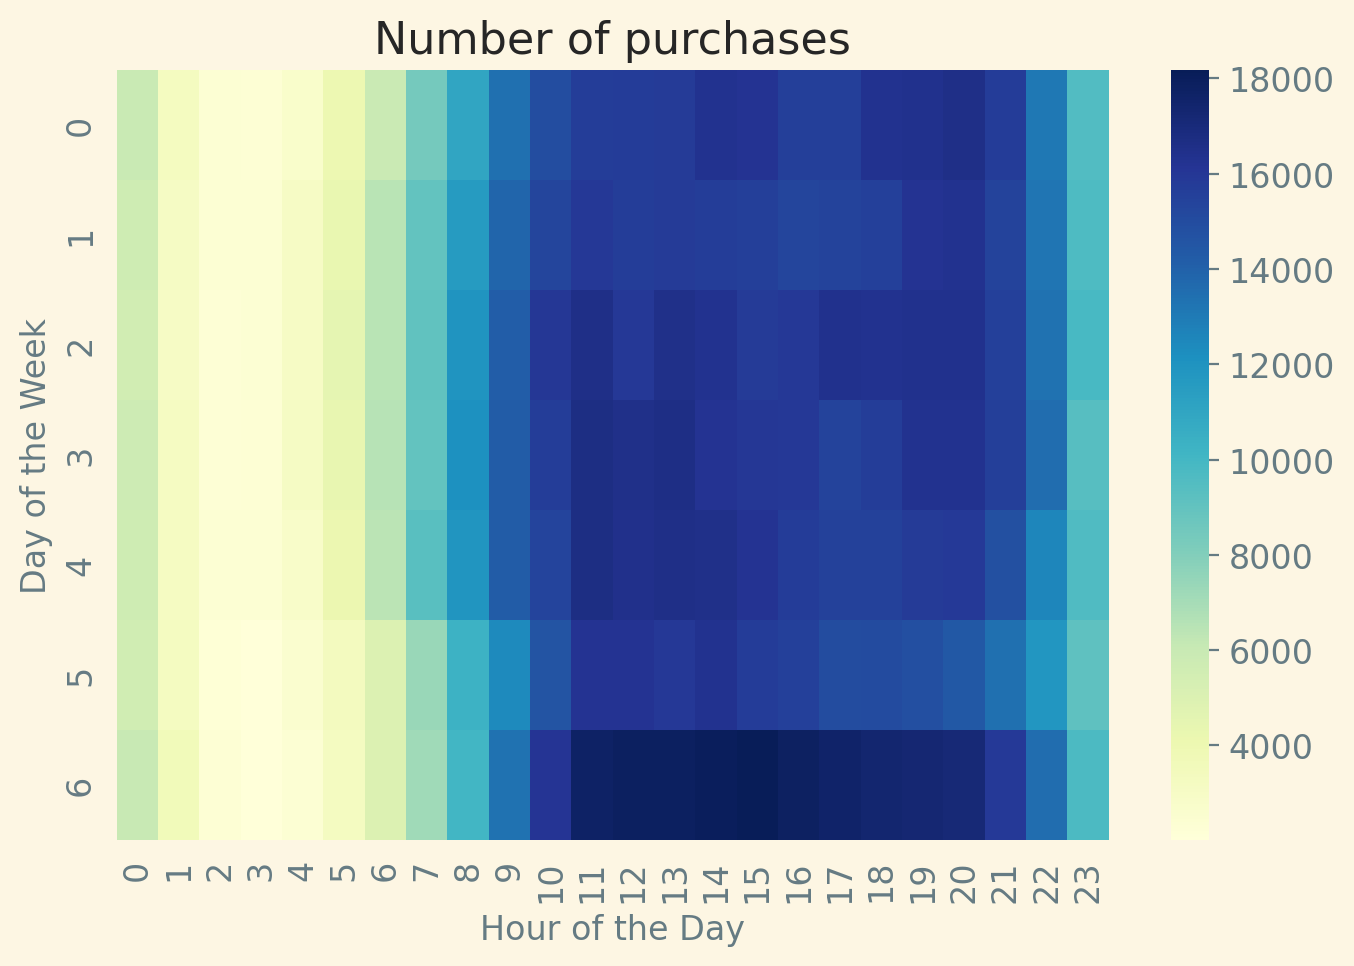

In [83]:
df_part["weekday"] = df_part['order_ts'].dt.dayofweek
df_part["hour"] = df_part['order_ts'].dt.hour

counts = df_part.groupby(['weekday', 'hour']).count()["item_id"].unstack()

sns.heatmap(counts, cmap='YlGnBu')

plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Number of purchases')

plt.show()